En esta sección, veremos la explicabilidad del modelo. Veremos como se comporta a bajas/medias/altas energías. Esta energía nos la dará la feature `trueE`, cuya feature no ha entrado dentro del proceso de entrenamiento, ya que es un valor que no se conoce durante el proceso de la clasificación de las energías.

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# Cambiar el directorio de trabajo
ruta_nueva = 'C:/Users/ruben.morillas/Desktop/aaa/'  # Reemplaza 'TuUsuario' con tu nombre de usuario de Windows
os.chdir(ruta_nueva)

# Mostrar el directorio actual para confirmar el cambio
directorio_actual = os.getcwd()
print("Directorio actual:", directorio_actual)

Directorio actual: C:\Users\ruben.morillas\Desktop\aaa


In [3]:
# Leemos los datos de train
path_actual = os.getcwd()
subdirectorio = 'datas'
file_train = 'df_train.csv'
path_train = os.path.join(path_actual, subdirectorio, file_train)
df_train = pd.read_csv(path_train, index_col=None)

In [4]:
# Leemos los datos de validacion
file_valid = 'df_valid.csv'
path_valid = os.path.join(path_actual,subdirectorio, file_valid)
df_valid = pd.read_csv(path_valid, index_col=None)

In [5]:
df_valid

,eventID,PDGcode,trueE,hitX,hitY,hitZ,hitTime,hitInteg
0,0,211,0.258707,-0.0020,-0.173207,0.2,1704.94,318.992
1,0,211,0.258707,0.0000,0.000000,0.5,1704.96,346.856
2,0,211,0.258707,0.0024,0.000000,0.7,1704.99,592.421
3,0,211,0.258707,0.0067,-0.346409,0.7,1698.51,1070.020
4,0,211,0.258707,0.0036,-0.519616,0.8,1698.47,889.101
...,...,...,...,...,...,...,...,...
3267899,19997,321,0.500785,1.9472,-12.124400,4.7,1726.72,357.400
3267900,19997,321,0.500785,1.9682,-12.817200,4.7,1723.61,338.582
3267901,19997,321,0.500785,2.0054,-12.470800,4.7,1727.47,333.317
3267902,19997,321,0.500785,1.6111,-13.683200,4.8,1719.04,368.375


In [6]:
df_train

,eventID,PDGcode,trueE,hitX,hitY,hitZ,hitTime,hitInteg
0,1,211,0.381965,13.5922,2.85275,-18.062,1872.38,1655.0600
1,1,211,0.381965,13.8270,2.79629,-17.893,1878.77,340.1960
2,1,211,0.381965,13.6746,2.74496,-17.677,1876.82,4047.6200
3,1,211,0.381965,13.5436,2.71796,-17.580,1878.30,1234.5500
4,1,211,0.381965,13.3256,2.72527,-17.542,1868.97,1394.2800
...,...,...,...,...,...,...,...,...
11612552,19999,321,0.511779,-26.7600,9.41895,45.739,1362.47,1825.6700
11612553,19999,321,0.511779,-26.8500,9.43314,45.757,1358.16,1862.7900
11612554,19999,321,0.511779,-26.8780,9.51059,46.057,1360.96,1586.2400
11612555,19999,321,0.511779,-26.9210,9.52140,46.063,1357.25,388.8380


Ahora veremos los posibles valores que tienen los diferentes hits para los diferentes eventos.

209    0.265781
210    0.265781
211    0.265781
212    0.265781
213    0.265781
         ...   
393    0.265781
394    0.265781
395    0.265781
396    0.265781
397    0.265781
Name: trueE, Length: 189, dtype: float64


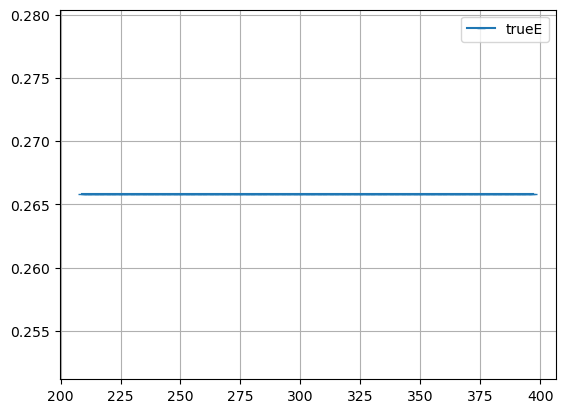

In [7]:
import matplotlib.pyplot as plt


filtro = (df_train['eventID'] == 2) & (df_train['PDGcode'] == 211)
resultados = df_train.loc[filtro, 'trueE']
print(resultados)

plt.plot(resultados, label='trueE', marker='_')
plt.grid(True)
plt.legend()  
plt.show()

In [8]:
import pandas as pd

# Suponiendo que df_train es tu DataFrame
grouped = df_train.groupby(['eventID', 'PDGcode'])['trueE'].nunique()

# Imprime el resultado para verificar
print(grouped)


eventID  PDGcode
1        211        1
         321        1
2        211        1
         321        1
4        211        1
                   ..
19993    321        1
19994    321        1
19995    321        1
19996    321        1
19999    321        1
Name: trueE, Length: 27615, dtype: int64


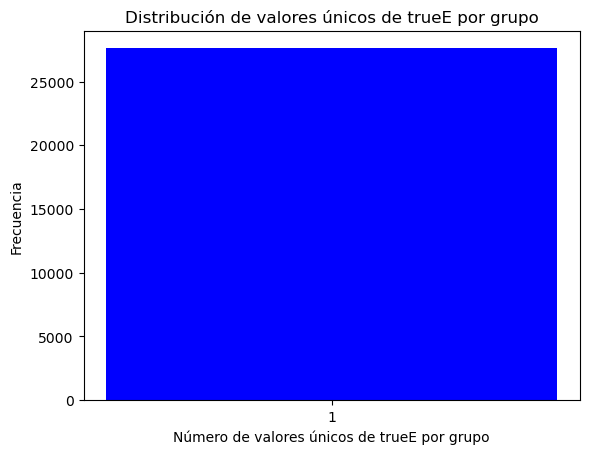

In [9]:
import matplotlib.pyplot as plt

# Dibuja un histograma de los valores únicos de trueE
plt.hist(grouped, bins=range(1, grouped.max()+2), align='left', color='blue', rwidth=0.8)
plt.xlabel('Número de valores únicos de trueE por grupo')
plt.ylabel('Frecuencia')
plt.title('Distribución de valores únicos de trueE por grupo')
plt.xticks(range(1, grouped.max()+1))  # Asegura que los ticks del eje X sean enteros
plt.show()


Como podemos ver, para un mismo evento todos los hits tiene el mismo valor de `trueE` esto pasa para todas los eventos. Es decir, no hay un evento que tenga dos o más valores de `trueE` para los diferentes hits que contiene un evento.

Ahora crearemos una funcion como la anterior donde creabamos el dataset para el entrenamiento del modelo, pero que guarde al principio de cada fila el valor de la variable de trueE. Para ello crearemos la siguiente función.

In [10]:
def filtrado_datos_energia(df, N):
    kaones = []
    labels = []
    valores_trueE = []  # Usamos un conjunto para almacenar valores únicos de trueE

    df_sorted = df.sort_values(by=['eventID', 'hitTime'], ascending=[True, False])

    for eventID, grupo in df_sorted.groupby('eventID'):
        pdgCodes = grupo['PDGcode'].unique()

        for pdgCode in pdgCodes:
            grupo_filtrado = grupo[grupo['PDGcode'] == pdgCode]
            grupo_ordenado = grupo_filtrado.head(N)

            # Obtener el valor de 'trueE' para el evento actual
            trueE_value = grupo_filtrado['trueE'].iloc[0]

            # Almacenar el valor de trueE en el conjunto
            valores_trueE.append(trueE_value)

            # Inicializar arrays para el padding
            hitX_padded = np.zeros(N)
            hitY_padded = np.zeros(N)
            hitZ_padded = np.zeros(N)
            hitInteg_padded = np.zeros(N)

            # Separar y aplicar padding a los valores de hitX, hitY, hitZ, hitInteg
            hitX_padded[:len(grupo_ordenado['hitX'])] = grupo_ordenado['hitX']
            hitY_padded[:len(grupo_ordenado['hitY'])] = grupo_ordenado['hitY']
            hitZ_padded[:len(grupo_ordenado['hitZ'])] = grupo_ordenado['hitZ']
            hitInteg_padded[:len(grupo_ordenado['hitInteg'])] = grupo_ordenado['hitInteg']

            # Concatenar los valores ya con el padding aplicado, añadiendo 'trueE' al principio
            hit_values_reorganized = np.concatenate([[trueE_value], hitX_padded, hitY_padded, hitZ_padded, hitInteg_padded])

            kaones.append(hit_values_reorganized)

            # Modificar las etiquetas de 211 a 0 y de 321 a 1
            if pdgCode == 211:
                labels.append(0)
            elif pdgCode == 321:
                labels.append(1)

    return np.array(kaones), np.array(labels), np.array(list(valores_trueE))

In [11]:
N=760
X_train, y_train, trueE_train = filtrado_datos_energia(df_train, N)

In [12]:
X_valid, y_valid, trueE_valid = filtrado_datos_energia(df_valid, N)

Para dividir en baja/media/alta energía tendremos que ordenar el numero de valores y dividir los valores en tres

In [13]:
def dividir_baja_media_alta(trueE):
    trueE_ordenado = np.sort(trueE)
    n_baja_media = len(trueE) // 3
    n_media_alta = (len(trueE) // 3) + n_baja_media
    baja_media = trueE_ordenado[n_baja_media]
    media_alta = trueE_ordenado[n_media_alta]
    
    return baja_media, media_alta

In [14]:
baja_media, media_alta = dividir_baja_media_alta(trueE_train)

print('Valor que corta en la zona baja/media', baja_media)
print('Valor que corta en media/alta', media_alta)

Valor que corta en la zona baja/media 0.42793
Valor que corta en media/alta 0.559643


In [15]:
def calcular_distintos_accuracy(X, y, y_predicciones, valor_baja_media, valor_media_alta):
    total_predicciones_bajas = np.sum(X[:, 0] < valor_baja_media)
    total_predicciones_medias = np.sum((X[:, 0] >= valor_baja_media) & (X[:, 0] < valor_media_alta))
    total_predicciones_altas = np.sum(X[:, 0] >= valor_media_alta)

    aciertos_bajas = np.sum((X[:, 0] < valor_baja_media) & (y == y_predicciones))
    error_bajas = total_predicciones_bajas - aciertos_bajas

    aciertos_medias = np.sum((X[:, 0] >= valor_baja_media) & (X[:, 0] < valor_media_alta) & (y == y_predicciones))
    error_medias = total_predicciones_medias - aciertos_medias

    aciertos_altas = np.sum((X[:, 0] >= valor_media_alta) & (y == y_predicciones))
    errores_altas = total_predicciones_altas - aciertos_altas

    accuracy_baja = aciertos_bajas / total_predicciones_bajas if total_predicciones_bajas > 0 else np.nan
    accuracy_media = aciertos_medias / total_predicciones_medias if total_predicciones_medias > 0 else np.nan
    accuracy_alta = aciertos_altas / total_predicciones_altas if total_predicciones_altas > 0 else np.nan

    return accuracy_baja, accuracy_media, accuracy_alta



In [16]:
from xgboost import XGBClassifier

# Parámetros que ya has definido
# Parámetros del modelo, incluyendo eval_metric aquí
params = {
    'booster': 'gbtree',
    'max_depth': 6,
    'gamma': 0,
    'learning_rate': 0.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',  # Especificar aquí
    'seed': 42
}

num_epochs = 8

# Inicializar el modelo XGBoost con eval_metric en el constructor
XGB_model = XGBClassifier(**params, n_estimators=num_epochs)

# Conjuntos de evaluación
eval_set = [(X_train[:, 1:], y_train), (X_valid[:, 1:], y_valid)]

# Entrenar el modelo sin especificar eval_metric en fit
XGB_model.fit(X_train[:, 1:], y_train, eval_set=eval_set, verbose=True)

# Predicciones
y_pred_valid = XGB_model.predict(X_valid[:, 1:])
y_pred_train = XGB_model.predict(X_train[:, 1:])

# Tus funciones de cálculo de accuracy específicas
accuracy_baja_train, accuracy_media_train, accuracy_alta_train = calcular_distintos_accuracy(X_train, y_train, y_pred_train, baja_media, media_alta)
accuracy_baja_valid, accuracy_media_valid, accuracy_alta_valid = calcular_distintos_accuracy(X_valid, y_valid, y_pred_valid, baja_media, media_alta)


[0]	validation_0-logloss:0.53096	validation_1-logloss:0.54017
[1]	validation_0-logloss:0.43393	validation_1-logloss:0.45053
[2]	validation_0-logloss:0.36386	validation_1-logloss:0.38746
[3]	validation_0-logloss:0.32016	validation_1-logloss:0.34882
[4]	validation_0-logloss:0.28641	validation_1-logloss:0.31834
[5]	validation_0-logloss:0.25970	validation_1-logloss:0.29544
[6]	validation_0-logloss:0.23554	validation_1-logloss:0.27553
[7]	validation_0-logloss:0.21505	validation_1-logloss:0.25975


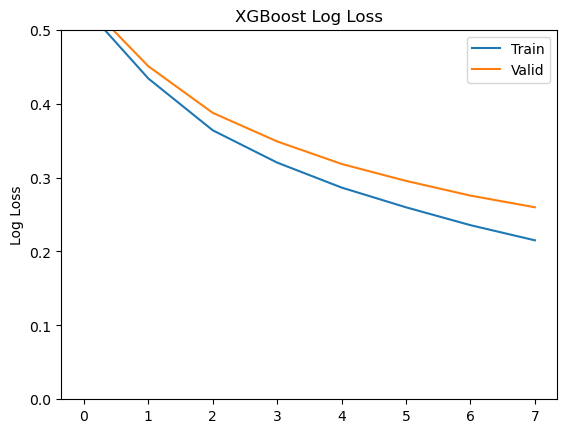

In [17]:
import matplotlib.pyplot as plt

# Extracción de los resultados de evaluación
results = XGB_model.evals_result()

# Configuración para la gráfica
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Valid')
ax.set_ylim([0, 0.5])
ax.legend()

plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()


In [18]:
from sklearn.metrics import accuracy_score

print('Resultados para train')
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train
print('Accuracy para train:', accuracy_train)
print('Accuracy para energías bajas:', accuracy_baja_train)
print('Accuracy para energías medias:', accuracy_media_train)
print('Accuracy para energías altas:', accuracy_alta_train)

Resultados para train
Accuracy para train: 0.9419518377693282
Accuracy para energías bajas: 0.958500814774579
Accuracy para energías medias: 0.9413362303096143
Accuracy para energías altas: 0.9260184682237914


In [19]:
print('Resultados para validacion')
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
accuracy_valid
print('Accuracy para validacion:', accuracy_valid)
print('Accuracy para energías bajas:', accuracy_baja_valid)
print('Accuracy para energías medias:', accuracy_media_valid)
print('Accuracy para energías altas:', accuracy_alta_valid)

Resultados para validacion
Accuracy para validacion: 0.9172474971486504
Accuracy para energías bajas: 0.9442960702022128
Accuracy para energías medias: 0.9077724060989215
Accuracy para energías altas: 0.8996512979465323


### Entrenamiento del modelo con los datos de train y valid

In [20]:
X = np.concatenate([X_train, X_valid])
y = np.concatenate([y_train, y_valid])

In [21]:
len(X[0])

3041

In [22]:
params = {
    'booster': 'gbtree',
    'max_depth': 6,
    'gamma': 0,
    'learning_rate': 0.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'seed': 42
}

num_epochs = 9
model = XGBClassifier(**params, n_estimators=num_epochs)
model.fit(X[:,1:], y)



XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=9, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
# Leemos los datos de test 
file_test = 'df_test.csv'
path_test = os.path.join(path_actual,subdirectorio, file_test)
df_test = pd.read_csv(path_test, index_col=None)


### Resultados en test

In [24]:
X_test, y_test, trueE_test = filtrado_datos_energia(df_test, N)

y_pred_test = model.predict(X_test[:,1:])

acc_baja_test, acc_media_test, acc_alta_test = calcular_distintos_accuracy(X_test, y_test, y_pred_test, baja_media, media_alta)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Resultados para test')
print('Accuracy para test', accuracy_test)
print('Accuracy para bajas energías en test: ', acc_baja_test)
print('Accuracy para medias energías en test', acc_media_test)
print('Accuracy para altas energía en test', acc_alta_test)


Resultados para test
Accuracy para test 0.9189052204764319
Accuracy para bajas energías en test:  0.9338905775075987
Accuracy para medias energías en test 0.9207920792079208
Accuracy para altas energía en test 0.9020501138952164


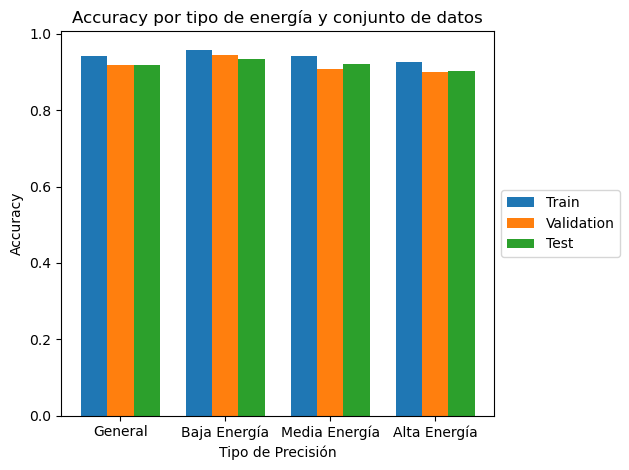

In [25]:
# Crear datos para el histograma
labels = ['General', 'Baja Energía', 'Media Energía', 'Alta Energía']
train_data = [accuracy_train, accuracy_baja_train, accuracy_media_train, accuracy_alta_train]
valid_data = [accuracy_valid, accuracy_baja_valid, accuracy_media_valid, accuracy_alta_valid]
test_data = [accuracy_test, acc_baja_test, acc_media_test, acc_alta_test]

x = range(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, train_data, width, label='Train')
rects2 = ax.bar([p + width for p in x], valid_data, width, label='Validation')
rects3 = ax.bar([p + width * 2 for p in x], test_data, width, label='Test')

# Añadir algunas etiquetas, título y etiquetas de ejes personalizadas
ax.set_xlabel('Tipo de Precisión')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy por tipo de energía y conjunto de datos')
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



fig.tight_layout()

plt.show()

### Guardamos en local el modelo

In [26]:
import joblib

joblib.dump(model, 'model_binary.pkl')


['model_binary.pkl']